Importing the Data and Encoding the Categorical Features

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Example DataFrame
data = pd.read_excel('/content/renault.xlsx')

df = pd.DataFrame(data)


Change the paint and its changing features that are not specified on the website with the help of the features from NER model

In [ ]:
import re
def convert_value(value,a_value):
    if value == 'Yok':
        return 0
    elif value == 'Belirtilmemiş':
        return a_value
    elif value == 'Tamamı boyalı' or value == 'Tamamı değişen' :
        return 25
    else:
        match = re.search(r'\d+', value)
        if match:
            return int(match.group(0))
        else:
            return value

In [ ]:
df['Değişen'] = df.apply(lambda row: convert_value(row['Değişen'], row['DEGISEN SAYISI NUMERİC']), axis=1)
df['Boya'] = df.apply(lambda row: convert_value(row['Boya'], row['BOYA SAYISI NUMERİC']), axis=1)

In [ ]:
df

,Fiyat,İlan No,Marka,Seri,Model,Yıl,Km,Vites Tipi,Yakıt Tipi,Kasa Tipi,...,BILGI YOK,TRAMER YOK,IYI_OZELLIK_NUMERIC,KOTU_OZELLIK_NUMERIC,TRAMER NUMERİK,BAKIM_DURUMU_BOOL,TRAMER YOK NUMERİK,BOYA SAYISI NUMERİC,DEGISEN SAYISI NUMERİC,YEDEK ANAHTAR BOOL
0,320000,25319621,Renault,Clio,1.2 Authentique,2004,272000,Düz,Benzin,Hatchback/5,...,[],['hasar kaydı yoktur'],0,0,0,1,1,0,0,0
1,645000,25319525,Renault,Clio,1.5 dCi Joy,2017,95000,Düz,Dizel,Hatchback/5,...,['renault clio 1 5 dci joy'],[],0,0,0,0,0,0,0,0
2,565000,25319405,Renault,Clio,1.5 dCi Touch,2015,208000,Düz,Dizel,Hatchback/5,...,[],[],1,0,0,0,0,0,0,0
3,289500,25319339,Renault,Clio,1.5 dCi Authentique,2003,290000,Düz,Dizel,Sedan,...,[],[],0,0,0,0,0,3,0,0
4,495000,25319317,Renault,Clio,0.9 TCe Icon,2013,126000,Düz,Benzin,Station wagon,...,[],[],4,0,14000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4479,565000,16480371,Renault,Clio,1.5 dCi SportTourer Joy,2016,193700,Düz,Dizel,Station wagon,...,[],[],1,0,0,0,0,2,0,1
4480,565000,14198384,Renault,Clio,1.5 dCi SportTourer Icon,2013,230000,Düz,Dizel,Station wagon,...,[],[],0,0,6400,0,0,5,1,0
4481,595000,12838693,Renault,Clio,1.5 dCi Touch,2015,171000,Düz,Dizel,Hatchback/5,...,[],[],0,0,0,0,0,0,0,0
4482,820000,11250701,Renault,Clio,1.0 TCe Joy,2022,25803,Otomatik,Benzin,Hatchback/5,...,[],[],0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['Fiyat', 'İlan No', 'Marka', 'Seri', 'Model', 'Yıl', 'Km', 'Vites Tipi',
       'Yakıt Tipi', 'Kasa Tipi', 'Renk', 'Motor Hacmi', 'Motor Gücü', 'Çekiş',
       'Ort. Yakıt Tüketimi', 'Yakıt Deposu', 'Boya-değişen', 'Değişen',
       'Boya', 'Kimden', 'Açıklama', 'Processed Açıklama Metni', 'sentiment',
       'sent-scores', 'DEGISEN', 'TRAMER', 'YEDEK ANAHTAR', 'BOYA',
       'BAKIM DURUMU', 'DEGISEN YOK', 'IYI OZELLIK', 'KOTU OZELLIK',
       'BILGI YOK', 'TRAMER YOK', 'IYI_OZELLIK_NUMERIC',
       'KOTU_OZELLIK_NUMERIC', 'TRAMER NUMERİK', 'BAKIM_DURUMU_BOOL',
       'TRAMER YOK NUMERİK', 'BOYA SAYISI NUMERİC', 'DEGISEN SAYISI NUMERİC',
       'YEDEK ANAHTAR BOOL'],
      dtype='object')

In [ ]:
df_alt = df.drop(columns=['Marka','Seri','İlan No','Boya-değişen', 'Kimden', 'Açıklama', 'Processed Açıklama Metni','DEGISEN', 'TRAMER', 'YEDEK ANAHTAR', 'BOYA',
       'BAKIM DURUMU', 'DEGISEN YOK', 'IYI OZELLIK', 'KOTU OZELLIK',
       'BILGI YOK','DEGISEN SAYISI NUMERİC','BOYA SAYISI NUMERİC','TRAMER YOK','TRAMER YOK NUMERİK'])  # Features

In [ ]:

# Encode categorical features
label_encoders = {}
for column in ['Model', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi','Renk','sentiment','Çekiş',]:
    le = LabelEncoder()
    df_alt[column] = le.fit_transform(df_alt[column])
    label_encoders[column] = le

# Normalize numerical features
scaler = StandardScaler()
df_alt[['Fiyat', 'Yıl', 'Km','Motor Hacmi','Motor Gücü','Ort. Yakıt Tüketimi','Yakıt Deposu', 'Değişen','Boya','IYI_OZELLIK_NUMERIC','KOTU_OZELLIK_NUMERIC','TRAMER NUMERİK','BAKIM_DURUMU_BOOL','YEDEK ANAHTAR BOOL']] = scaler.fit_transform(df_alt[['Fiyat', 'Yıl', 'Km','Motor Hacmi','Motor Gücü','Ort. Yakıt Tüketimi','Yakıt Deposu', 'Değişen','Boya','IYI_OZELLIK_NUMERIC','KOTU_OZELLIK_NUMERIC','TRAMER NUMERİK','BAKIM_DURUMU_BOOL','YEDEK ANAHTAR BOOL']] )


Training the Price Prediction Model

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
len(df_alt.columns)

22

In [ ]:
df_alt

,Fiyat,Model,Yıl,Km,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,...,Yakıt Deposu,Değişen,Boya,sentiment,sent-scores,IYI_OZELLIK_NUMERIC,KOTU_OZELLIK_NUMERIC,TRAMER NUMERİK,BAKIM_DURUMU_BOOL,YEDEK ANAHTAR BOOL
0,-1.078807,11,-0.986968,1.144471,0,0,1,5,-0.081357,-0.070502,...,1.720787,-0.538068,-0.525727,0,0.647139,-0.506031,-0.247012,-0.014986,2.120165,-0.342184
1,0.646655,69,0.783149,-0.780282,0,1,1,2,-0.081330,-0.070502,...,-0.647904,0.792708,-0.525727,1,0.529421,-0.506031,-0.247012,-0.014986,-0.471661,-0.342184
2,0.221926,77,0.510823,0.448515,0,1,1,2,-0.081330,-0.070502,...,-0.647904,-0.538068,-0.525727,0,0.812231,0.305501,-0.247012,-0.014986,-0.471661,-0.342184
3,-1.240735,53,-1.123131,1.340208,0,1,2,20,-0.081330,-0.072523,...,0.536442,0.792708,0.038775,0,0.982429,-0.506031,-0.247012,-0.014986,-0.471661,-0.342184
4,-0.149712,0,0.238498,-0.443178,0,0,3,17,-0.081378,-0.067470,...,-0.647904,2.123483,0.038775,1,0.579122,2.740095,-0.247012,-0.014798,-0.471661,-0.342184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4479,0.221926,73,0.646986,0.293012,0,1,3,2,-0.081330,-0.070502,...,-0.647904,0.792708,0.321026,1,0.841054,0.305501,-0.247012,-0.014986,-0.471661,2.922401
4480,0.221926,72,0.238498,0.687750,0,1,3,2,-0.081330,-0.067470,...,-0.647904,0.792708,0.885527,1,0.688087,-0.506031,-0.247012,-0.014900,-0.471661,-0.342184
4481,0.381199,77,0.510823,0.046166,0,1,1,2,-0.081330,-0.070502,...,-0.647904,-0.538068,0.038775,0,0.600600,-0.506031,-0.247012,-0.014986,-0.471661,-0.342184
4482,1.575750,7,1.463963,-1.532751,1,0,1,2,-0.081370,-0.065448,...,-1.358511,-0.538068,-0.525727,1,0.857705,-0.506031,-0.247012,-0.014986,-0.471661,-0.342184


Determine feature sets

In [ ]:
feature_sets = [
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Çekiş', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya', 'sentiment', 'sent-scores',
       'IYI_OZELLIK_NUMERIC', 'KOTU_OZELLIK_NUMERIC', 'TRAMER NUMERİK',
       'BAKIM_DURUMU_BOOL', 'YEDEK ANAHTAR BOOL'],
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Çekiş', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya'],
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Çekiş', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya', 'sentiment'],
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Çekiş', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya', 'sent-scores'],
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Çekiş', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya',
       'IYI_OZELLIK_NUMERIC'],
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Çekiş', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya','KOTU_OZELLIK_NUMERIC'],
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Çekiş', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya', 'TRAMER NUMERİK'],
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Çekiş', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya',
       'BAKIM_DURUMU_BOOL'],
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Çekiş', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen','YEDEK ANAHTAR BOOL'],
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Çekiş', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya', 'sentiment',
       'IYI_OZELLIK_NUMERIC', 'KOTU_OZELLIK_NUMERIC', 'TRAMER NUMERİK',
       'BAKIM_DURUMU_BOOL'],
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya', 'sentiment',
       'IYI_OZELLIK_NUMERIC', 'TRAMER NUMERİK'],
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya', 'sentiment',
       'IYI_OZELLIK_NUMERIC', 'KOTU_OZELLIK_NUMERIC', 'TRAMER NUMERİK',
       'BAKIM_DURUMU_BOOL'],
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya', 'sentiment',
       'IYI_OZELLIK_NUMERIC', 'KOTU_OZELLIK_NUMERIC', 'TRAMER NUMERİK'],
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya', 'sentiment',
       'IYI_OZELLIK_NUMERIC', 'KOTU_OZELLIK_NUMERIC', 'TRAMER NUMERİK','Çekiş']

]



In [ ]:
feature_sets1 = [
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Çekiş', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya', 'sentiment', 'sent-scores',
       'IYI_OZELLIK_NUMERIC', 'KOTU_OZELLIK_NUMERIC', 'TRAMER NUMERİK',
       'BAKIM_DURUMU_BOOL', 'YEDEK ANAHTAR BOOL'],
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Çekiş', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya'],
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Çekiş', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya', 'sentiment',
       'IYI_OZELLIK_NUMERIC', 'KOTU_OZELLIK_NUMERIC', 'TRAMER NUMERİK',
       'BAKIM_DURUMU_BOOL', 'YEDEK ANAHTAR BOOL'],
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya', 'sentiment',
       'IYI_OZELLIK_NUMERIC', 'KOTU_OZELLIK_NUMERIC', 'TRAMER NUMERİK',
       'BAKIM_DURUMU_BOOL', 'YEDEK ANAHTAR BOOL'],
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Çekiş', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya', 'sentiment',
       'IYI_OZELLIK_NUMERIC', 'KOTU_OZELLIK_NUMERIC', 'TRAMER NUMERİK',
       'BAKIM_DURUMU_BOOL'],
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya', 'sentiment',
       'IYI_OZELLIK_NUMERIC', 'KOTU_OZELLIK_NUMERIC', 'TRAMER NUMERİK',
       'BAKIM_DURUMU_BOOL'],
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Çekiş', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya',
       'IYI_OZELLIK_NUMERIC', 'KOTU_OZELLIK_NUMERIC', 'TRAMER NUMERİK'],
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü',  'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya',
       'IYI_OZELLIK_NUMERIC', 'KOTU_OZELLIK_NUMERIC', 'TRAMER NUMERİK'],
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü',  'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya',
       'IYI_OZELLIK_NUMERIC', 'KOTU_OZELLIK_NUMERIC', 'TRAMER NUMERİK',
       'BAKIM_DURUMU_BOOL','Çekiş'],
    ['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü',  'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya','IYI_OZELLIK_NUMERIC', 'KOTU_OZELLIK_NUMERIC', 'TRAMER NUMERİK',
       'BAKIM_DURUMU_BOOL',]
]



Evaluate the model for each feature set (Random Forest)

In [ ]:
for i, features in enumerate(feature_sets):
    X = df_alt[features]
    y = df_alt['Fiyat']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate performance metrics
    mae_selected = mean_absolute_error(y_test, y_pred)
    rmse_selected = mean_squared_error(y_test, y_pred, squared=False)
    r2_selected = r2_score(y_test, y_pred)
    mape_selected = mean_absolute_percentage_error(y_test, y_pred)
    print(i)
    print(f'Mean Absolute Error with selected features: {mae_selected}')
    print(f'Root Mean Squared Error with selected features: {rmse_selected}')
    print(f'R-squared with selected features: {r2_selected}')
    print(f'Mean Absolute Percentage Error with selected features: {mape_selected}')

0
Mean Absolute Error with selected features: 0.17676766240693711
Root Mean Squared Error with selected features: 0.23733554227825074
R-squared with selected features: 0.9423440606531114
Mean Absolute Percentage Error with selected features: 0.5835233048109312
1
Mean Absolute Error with selected features: 0.17498351921300598
Root Mean Squared Error with selected features: 0.23676917920849921
R-squared with selected features: 0.9426189055625162
Mean Absolute Percentage Error with selected features: 0.5922556315449521
2
Mean Absolute Error with selected features: 0.17525620922005056
Root Mean Squared Error with selected features: 0.2361205781348129
R-squared with selected features: 0.9429328523625677
Mean Absolute Percentage Error with selected features: 0.5896624075020926
3
Mean Absolute Error with selected features: 0.17608225744265377
Root Mean Squared Error with selected features: 0.23789674994446286
R-squared with selected features: 0.9420710698422379
Mean Absolute Percentage Error 

Evaluate the model for each feature set (XGBoost)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from xgboost import XGBRegressor

for i, features in enumerate(feature_sets):
    X = df_alt[features]
    y = df_alt['Fiyat']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mae_selected = mean_absolute_error(y_test, y_pred)
    rmse_selected = mean_squared_error(y_test, y_pred, squared=False)
    r2_selected = r2_score(y_test, y_pred)
    mape_selected = mean_absolute_percentage_error(y_test, y_pred)

    print(i)
    print(f'Mean Absolute Error with selected features: {mae_selected}')
    print(f'Root Mean Squared Error with selected features: {rmse_selected}')
    print(f'R-squared with selected features: {r2_selected}')
    print(f'Mean Absolute Percentage Error with selected features: {mape_selected}')

0
Mean Absolute Error with selected features: 0.1730736366987456
Root Mean Squared Error with selected features: 0.23087691149693604
R-squared with selected features: 0.9454393546776412
Mean Absolute Percentage Error with selected features: 0.591849421096747
1
Mean Absolute Error with selected features: 0.17280603146607962
Root Mean Squared Error with selected features: 0.2344896137195339
R-squared with selected features: 0.9437184936597793
Mean Absolute Percentage Error with selected features: 0.592931867063517
2
Mean Absolute Error with selected features: 0.17230440116425116
Root Mean Squared Error with selected features: 0.2320802205182756
R-squared with selected features: 0.9448691425607645
Mean Absolute Percentage Error with selected features: 0.5969181448915784
3
Mean Absolute Error with selected features: 0.1726684344572755
Root Mean Squared Error with selected features: 0.2350062674567461
R-squared with selected features: 0.9434702090203779
Mean Absolute Percentage Error with s

Evaluate the model for each feature set (LGBM)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from lightgbm import LGBMRegressor

for i, features in enumerate(feature_sets):
    X = df_alt[features]
    y = df_alt['Fiyat']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LGBMRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mae_selected = mean_absolute_error(y_test, y_pred)
    rmse_selected = mean_squared_error(y_test, y_pred, squared=False)
    r2_selected = r2_score(y_test, y_pred)
    mape_selected = mean_absolute_percentage_error(y_test, y_pred)

    print(i)
    print(f'Mean Absolute Error with selected features: {mae_selected}')
    print(f'Root Mean Squared Error with selected features: {rmse_selected}')
    print(f'R-squared with selected features: {r2_selected}')
    print(f'Mean Absolute Percentage Error with selected features: {mape_selected}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 871
[LightGBM] [Info] Number of data points in the train set: 3587, number of used features: 20
[LightGBM] [Info] Start training from score -0.002125
0
Mean Absolute Error with selected features: 0.1659562268142122
Root Mean Squared Error with selected features: 0.2250986632699534
R-squared with selected features: 0.9481362014038791
Mean Absolute Percentage Error with selected features: 0.5210963813041634
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory 

In [ ]:
X = df_alt[['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya', 'sentiment',
       'IYI_OZELLIK_NUMERIC', 'TRAMER NUMERİK']]
y = df_alt['Fiyat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Calculate performance metrics
mae_selected = mean_absolute_error(y_test, y_pred)
rmse_selected = mean_squared_error(y_test, y_pred, squared=False)
r2_selected = r2_score(y_test, y_pred)
mape_selected = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Error with selected features: {mae_selected}')
print(f'Root Mean Squared Error with selected features: {rmse_selected}')
print(f'R-squared with selected features: {r2_selected}')
print(f'Mean Absolute Percentage Error with selected features: {mape_selected}')

Mean Absolute Error with selected features: 0.17446871222510593
Root Mean Squared Error with selected features: 0.2339012154764113
R-squared with selected features: 0.9440005905123856
Mean Absolute Percentage Error with selected features: 0.5840814160911663


#Feature Selection

###-Feature selection with Mutual Information:
Mutual information measures the dependency between features and the target variable.

In [ ]:
df_alt

,Fiyat,Model,Yıl,Km,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,...,Yakıt Deposu,Değişen,Boya,sentiment,sent-scores,IYI_OZELLIK_NUMERIC,KOTU_OZELLIK_NUMERIC,TRAMER NUMERİK,BAKIM_DURUMU_BOOL,YEDEK ANAHTAR BOOL
0,-1.078807,11,-0.986968,1.144471,0,0,1,5,-0.081357,-0.070502,...,1.720787,-0.538068,-0.525727,0,0.647139,-0.506031,-0.247012,-0.014986,2.120165,-0.342184
1,0.646655,69,0.783149,-0.780282,0,1,1,2,-0.081330,-0.070502,...,-0.647904,0.792708,-0.525727,1,0.529421,-0.506031,-0.247012,-0.014986,-0.471661,-0.342184
2,0.221926,77,0.510823,0.448515,0,1,1,2,-0.081330,-0.070502,...,-0.647904,-0.538068,-0.525727,0,0.812231,0.305501,-0.247012,-0.014986,-0.471661,-0.342184
3,-1.240735,53,-1.123131,1.340208,0,1,2,20,-0.081330,-0.072523,...,0.536442,0.792708,0.038775,0,0.982429,-0.506031,-0.247012,-0.014986,-0.471661,-0.342184
4,-0.149712,0,0.238498,-0.443178,0,0,3,17,-0.081378,-0.067470,...,-0.647904,2.123483,0.038775,1,0.579122,2.740095,-0.247012,-0.014798,-0.471661,-0.342184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4479,0.221926,73,0.646986,0.293012,0,1,3,2,-0.081330,-0.070502,...,-0.647904,0.792708,0.321026,1,0.841054,0.305501,-0.247012,-0.014986,-0.471661,2.922401
4480,0.221926,72,0.238498,0.687750,0,1,3,2,-0.081330,-0.067470,...,-0.647904,0.792708,0.885527,1,0.688087,-0.506031,-0.247012,-0.014900,-0.471661,-0.342184
4481,0.381199,77,0.510823,0.046166,0,1,1,2,-0.081330,-0.070502,...,-0.647904,-0.538068,0.038775,0,0.600600,-0.506031,-0.247012,-0.014986,-0.471661,-0.342184
4482,1.575750,7,1.463963,-1.532751,1,0,1,2,-0.081370,-0.065448,...,-1.358511,-0.538068,-0.525727,1,0.857705,-0.506031,-0.247012,-0.014986,-0.471661,-0.342184


In [ ]:
df_alt.columns

Index(['Fiyat', 'Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Çekiş', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya', 'sentiment', 'sent-scores',
       'IYI_OZELLIK_NUMERIC', 'KOTU_OZELLIK_NUMERIC', 'TRAMER NUMERİK',
       'BAKIM_DURUMU_BOOL', 'YEDEK ANAHTAR BOOL'],
      dtype='object')

In [ ]:
df_alt

,Fiyat,Model,Yıl,Km,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,...,Yakıt Deposu,Değişen,Boya,sentiment,sent-scores,IYI_OZELLIK_NUMERIC,KOTU_OZELLIK_NUMERIC,TRAMER NUMERİK,BAKIM_DURUMU_BOOL,YEDEK ANAHTAR BOOL
0,-1.078807,11,-0.986968,1.144471,0,0,1,5,-0.081357,-0.070502,...,1.720787,-0.538068,-0.525727,0,0.647139,-0.506031,-0.247012,-0.014986,2.120165,-0.342184
1,0.646655,69,0.783149,-0.780282,0,1,1,2,-0.081330,-0.070502,...,-0.647904,0.792708,-0.525727,1,0.529421,-0.506031,-0.247012,-0.014986,-0.471661,-0.342184
2,0.221926,77,0.510823,0.448515,0,1,1,2,-0.081330,-0.070502,...,-0.647904,-0.538068,-0.525727,0,0.812231,0.305501,-0.247012,-0.014986,-0.471661,-0.342184
3,-1.240735,53,-1.123131,1.340208,0,1,2,20,-0.081330,-0.072523,...,0.536442,0.792708,0.038775,0,0.982429,-0.506031,-0.247012,-0.014986,-0.471661,-0.342184
4,-0.149712,0,0.238498,-0.443178,0,0,3,17,-0.081378,-0.067470,...,-0.647904,2.123483,0.038775,1,0.579122,2.740095,-0.247012,-0.014798,-0.471661,-0.342184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4479,0.221926,73,0.646986,0.293012,0,1,3,2,-0.081330,-0.070502,...,-0.647904,0.792708,0.321026,1,0.841054,0.305501,-0.247012,-0.014986,-0.471661,2.922401
4480,0.221926,72,0.238498,0.687750,0,1,3,2,-0.081330,-0.067470,...,-0.647904,0.792708,0.885527,1,0.688087,-0.506031,-0.247012,-0.014900,-0.471661,-0.342184
4481,0.381199,77,0.510823,0.046166,0,1,1,2,-0.081330,-0.070502,...,-0.647904,-0.538068,0.038775,0,0.600600,-0.506031,-0.247012,-0.014986,-0.471661,-0.342184
4482,1.575750,7,1.463963,-1.532751,1,0,1,2,-0.081370,-0.065448,...,-1.358511,-0.538068,-0.525727,1,0.857705,-0.506031,-0.247012,-0.014986,-0.471661,-0.342184


In [ ]:
# Define features and target
features = df_alt[['Model', 'Yıl', 'Km', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Ort. Yakıt Tüketimi',
       'Yakıt Deposu', 'Değişen', 'Boya', 'sentiment',
       'IYI_OZELLIK_NUMERIC', 'TRAMER NUMERİK']]
target = df_alt['Fiyat']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Calculate mutual information
mi = mutual_info_regression(X_train, y_train)
mi = pd.Series(mi, index=X_train.columns)
mi = mi.sort_values(ascending=False)
print("Mutual Information Scores:")
print(mi)

# Select top features based on mutual information
top_features = mi.index[:]
print("Top Features based on Mutual Information:")
print(top_features)



Mutual Information Scores:
Yıl                    0.988406
Model                  0.947856
Ort. Yakıt Tüketimi    0.814954
Yakıt Deposu           0.793178
Km                     0.578297
Kasa Tipi              0.293916
Motor Hacmi            0.289107
Renk                   0.279877
Motor Gücü             0.262663
Vites Tipi             0.241348
Yakıt Tipi             0.233550
Boya                   0.097218
Değişen                0.053222
IYI_OZELLIK_NUMERIC    0.042056
sentiment              0.024045
TRAMER NUMERİK         0.017249
dtype: float64
Top Features based on Mutual Information:
Index(['Yıl', 'Model', 'Ort. Yakıt Tüketimi', 'Yakıt Deposu', 'Km',
       'Kasa Tipi', 'Motor Hacmi', 'Renk', 'Motor Gücü', 'Vites Tipi',
       'Yakıt Tipi', 'Boya', 'Değişen', 'IYI_OZELLIK_NUMERIC', 'sentiment',
       'TRAMER NUMERİK'],
      dtype='object')


In [ ]:
# Train a new model using only the top features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# Calculate performance metrics
mae_selected = mean_absolute_error(y_test, y_pred)
rmse_selected = mean_squared_error(y_test, y_pred, squared=False)
r2_selected = r2_score(y_test, y_pred)
mape_selected = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Absolute Error with selected features: {mae_selected}')
print(f'Root Mean Squared Error with selected features: {rmse_selected}')
print(f'R-squared with selected features: {r2_selected}')
print(f'Mean Absolute Percentage Error with selected features: {mape_selected}')

# Print the selected features
print("Selected Features for the Model:")
print(top_features)

Mean Absolute Error with selected features: 0.17428442508321623
Root Mean Squared Error with selected features: 0.23435604800798068
R-squared with selected features: 0.9437825914967314
Mean Absolute Percentage Error with selected features: 0.5835577422711947
Selected Features for the Model:
Index(['Yıl', 'Model', 'Ort. Yakıt Tüketimi', 'Yakıt Deposu', 'Km',
       'Kasa Tipi', 'Motor Hacmi', 'Renk', 'Motor Gücü', 'Vites Tipi',
       'Yakıt Tipi', 'Boya', 'Değişen', 'IYI_OZELLIK_NUMERIC', 'sentiment',
       'TRAMER NUMERİK'],
      dtype='object')


##Feature Importance Using RandomForest

                Feature  Importance
1                   Yıl    0.741959
3            Vites Tipi    0.104183
2                    Km    0.102164
9   Ort. Yakıt Tüketimi    0.008993
0                 Model    0.008598
12                 Boya    0.007240
8            Motor Gücü    0.005711
6                  Renk    0.005162
11              Değişen    0.004027
14  IYI_OZELLIK_NUMERIC    0.003055
10         Yakıt Deposu    0.002813
15       TRAMER NUMERİK    0.001814
13            sentiment    0.001596
4            Yakıt Tipi    0.001051
5             Kasa Tipi    0.001041
7           Motor Hacmi    0.000592


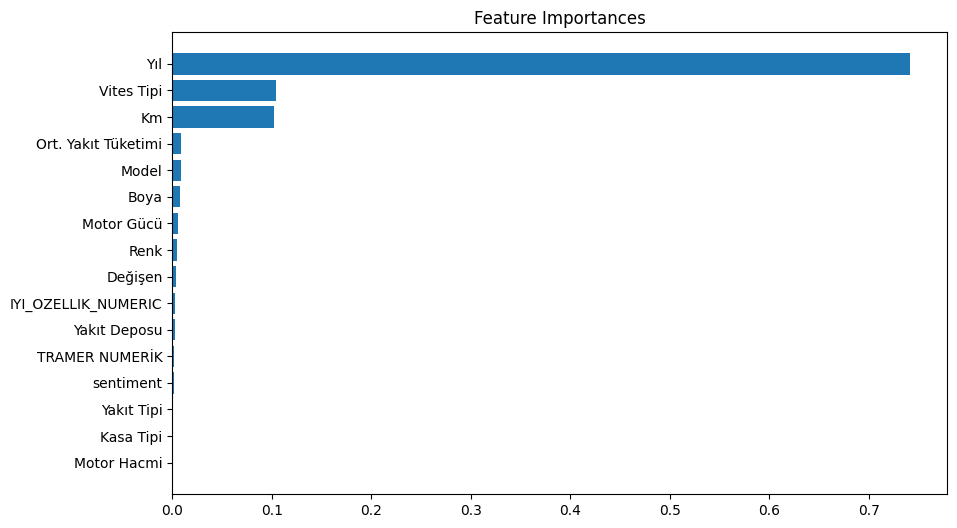

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# Train a RandomForest model to get feature importances
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = features.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.gca().invert_yaxis()
plt.show()
